# Lecture 7 - Bayesian Interpretation; Maximum Likelihood Estimation (MLE) & Maximum A Posteriori (MAP)

# Bayesian Interpretation of the Least  Squares Estimator ($\hat{\mathbf{w}}$)

We have seen some deﬁnitions of common estimators and analyzed their properties. But where did these estimators come from? Rather than guessing that some function might make a good estimator and then analyzing its bias and variance, we would like to have some principle from which we can derive specific functions that are good estimators for different models.

Let's try to understand this better. Consider the objective function:

\begin{align*}
J(\mathbf{w}) &= \frac{1}{2}\sum_{i=1}^N \left(t_i - y(\phi(x_i),\mathbf{w})\right)^2
\end{align*}

where $\mathbf{y}(\phi(\mathbf{x}),\mathbf{w})$ is a model representation (e.g., linear regression), and $\phi(x)$ is a feature mapping function (e.g. Gaussian Basis functions).

The most common such principle is the **maximum likelihood** principle. Consider a set of $N$ examples $\mathbf{x}=[x_1,x_2,\dots,x_N]^T$ drawn independently from the true but unknown data-generating distribution $p_{\text{data}}(x)$.

Let $p_{\text{model}}(\phi(x);\mathbf{w})$ be a parametric family of probability distributions over the same space indexed by $\mathbf{w}$. In other words, $p_{\text{model}}(\phi(x);\mathbf{w})$ maps any conﬁguration $\phi(x)$ to a real number estimating the true probability $p_{\text{data}}(\phi(x))$.

The maximum likelihood estimator for $\mathbf{w}$ is then deﬁned as:

\begin{align*}
\mathbf{w}_{\text{MLE}} &= \arg_{\mathbf{w}}\max p_{\text{model}}(\phi(\mathbf{x}); \mathbf{w}) \\
&= \arg_{\mathbf{w}}\max \prod_{i=1}^N p_{\text{model}}(\phi(x_i); \mathbf{w}) 
\end{align*}

This product over many probabilities can be inconvenient for various reasons. For example, it is prone to numerical underﬂow. To obtain a more convenient but equivalent optimization problem, we observe that taking the logarithm of the likelihood does not change its arg max but does conveniently transform a product.

\begin{align*}
\mathbf{w}_{\text{MLE}} &= \arg_{\mathbf{w}}\max \sum_{i=1}^N \log p_{\text{model}}(\phi(x_i); \mathbf{w}) 
\end{align*}

Because the arg max does not change when we rescale the cost function, we can divide by $N$ to obtain a version of the criterion that is expressed as an expectation with respect to the empirical distribution $p_{\text{data}}$ deﬁned by the training data:

\begin{align*}
\mathbf{w}_{\text{MLE}} &= \arg_{\mathbf{w}}\max \mathbb{E}_{\phi(x)\sim \hat{p}_{\text{data}}} \left[\log p_{\text{model}}(\phi(x_i); \mathbf{w})\right]
\end{align*}

## Log-Likelihood and the Least Squares Solution

The maximum likelihood estimator can readily be generalized to estimate a conditional probability $P(\mathbf{t}|\phi(\mathbf{x}); \mathbf{w})$ in order to predict $t$ given $\phi(x)$. This is actually the most common situation because it forms the basis for most supervised learning. If $\mathbf{x}$ represents all our inputs and $\mathbf{t} all our observed targets, then the conditional maximum likelihood estimator is

\begin{align*}
\mathbf{w}_{\text{MLE}} &= \arg_{\mathbf{w}} \max P(\mathbf{t} | \phi(\mathbf{x}); \mathbf{w})
\end{align*}

If the examples are assumed to be i.i.d., then this can be decomposed into

\begin{align*}
\mathbf{w}_{\text{MLE}} &= \arg_{\mathbf{w}} \max \sum_{i=1}^N \log P(t_i | \phi(x_i); \mathbf{w})
\end{align*}

# Least Squares Solution of Linear Regression as the Maximum Likelihood Estimation (MLE) of $\mathbf{w}$

Linear regression with the least squares objective function may be justified as a maximum likelihood procedure. Previously, we motivated linear regression as an algorithm that learns to take a feature input $\phi(x)$ and produce an output value $y$. The mapping from $\phi(x)$ to $y$ is chosen to minimize the mean squared error, a criterion that we introduced more or less arbitrarily. 

We now revisit linear regression from the point of view of maximum likelihood estimation. Instead of producing a single prediction $y$, we now think of the model as producing a conditional distribution $p(\mathbf{t}|\phi(\mathbf{x}))$. We can imagine that with an infinitely large training set, we might see several training examples with the same input value $\phi(\mathbf{x})$ but different values of $\mathbf{t}$. The goal of the learning algorithm is now to fit the distribution $p(t|\phi(x))$ to all those different $t$ values that are all compatible with $\phi(x)$. To derive the same linear regression algorithm we obtained before, we define $p(t|\phi(x)) = \mathcal{N}\left(t; f(\phi(\mathbf{x});\mathbf{w}), \sigma^2\right)$. The function $f(\phi(\mathbf{x});\mathbf{w})$ gives the prediction of the mean of the Gaussian. 

In this example, we assume that the variance is fixed to some constant $sigma^2$ chosen by the user. We will see that this choice of the functional form of $p(\mathbf{t}|\phi(\mathbf{x}))$ causes the maximum likelihood estimation procedure to yield the same learning algorithm as we developed before. Since the examples are assumed to be i.i.d., the conditional log-likelihood is given by

\begin{align*}
\mathcal{L} = \log p(t_i | \phi(x_i); \mathbf{w}) &= -N\log\sigma -\frac{N}{2}\log(2\pi)-\sum_{i=1}^N\frac{(t_i-y_i)^2}{2\sigma^2}
\end{align*}

___

## Complete Derivation

Let's see how we can arrive at this same solution from a different perpective:

\begin{align*}
\arg_{\mathbf{w}} \min J(\mathbf{w}) &= \arg_{\mathbf{w}} \max - J(\mathbf{w})\\
&= \arg_{\mathbf{w}} \max \exp\left(-J(\mathbf{w})\right)\\
&= \arg_{\mathbf{w}} \max \exp\left(-\frac{1}{2}\sum_{i=1}^N \left(t_i - y_i\right)^2\right)\\
&= \arg_{\mathbf{w}} \max \prod_{i=1}^N\exp\left(-\frac{1}{2} \left(t_i - y_i\right)^2\right)\\
&\propto \arg_{\mathbf{w}} \max \prod_{i=1}^N \mathcal{N}\left(t_i;y_i,1\right)
\end{align*}

Recall that the univariate Gaussian pdf is defined as: $\mathcal{N}(x; \mu, \sigma^2) \sim \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right)$.

Applying our "trick", the natural logarithm:

\begin{align*}
\arg_{\mathbf{w}} \max & \prod_{i=1}^N \mathcal{N}\left(t_i;y_i,1\right)\\
\propto & \arg_{\mathbf{w}} \max \ln \prod_{i=1}^N \mathcal{N}\left(t_i;y_i,1\right)\\
= & \arg_{\mathbf{w}} \max \sum_{i=1}^N \ln \mathcal{N}\left(t_i;y_i,1\right)
\end{align*}

We can expand the last term as:

\begin{align*}
\sum_{i=1}^N \ln \mathcal{N}\left(t_i;y_i,1\right) &= \sum_{i=1}^N \ln \left( \frac{1}{\sqrt{2\pi}} \exp\left\{-\frac{1}{2} (t_i-y_i)^2 \right\} \right)\\
&= \sum_{i=1}^N -\frac{1}{2}\ln(2\pi) - \frac{1}{2}(t_i-y_i)^2\\
&= -\frac{N}{2} -\sum_{i=1}^N \frac{1}{2}(t_i-y_i)^2
\end{align*}

The next step to find the arg $\mathbf{w}$ that maximizes this log-likelihood is to take the derivative of this function with respect to (w.r.t.) $\mathbf{w}$, set it to 0 and solve for $\mathbf{w}$.

If we consider the special case of a linear regression model, we have: $y_i = \sum_{j=0}^M w_jx_i^j = \mathbf{w}^T\phi(x_i)$, where $\phi(x)$ is the polynomial basis function. Hence:

\begin{align*}
\mathcal{L} &= -\frac{N}{2} -\sum_{i=1}^N \frac{1}{2}(t_i-\mathbf{w}^T\phi(x_i))^2\\
&= -\frac{N}{2} - \frac{1}{2} \Vert \mathbf{t} - \mathbf{X}\mathbf{w}\Vert^2_2
\end{align*}

As before, if we take the derivative

\begin{align*}
\frac{\partial\mathcal{L}}{\partial\mathbf{w}}=0
\end{align*}

We will arrive at the same solution:

\begin{align*}
\mathbf{w}_{\text{MLE}} &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t}
\end{align*}

___

## Ridge Regression as Maximum A Posteriori (MAP)

**How can we interpret the optimization problem when we consider a regularization term (ridge or lasso) in the objective function?**

Consider 

\begin{align*}
J(\mathbf{w}) = \frac{1}{2}\sum_{i=1}^N (t_i - y_i)^2 + \frac{\lambda}{2}\sum_{j=0}^M w_j^2
\end{align*}

As before, we have 

\begin{align*}
\arg_{\mathbf{w}} \min J(\mathbf{w}) &= \arg_{\mathbf{w}} \max - J(\mathbf{w})\\
&= \arg_{\mathbf{w}} \max \exp\left(-J(\mathbf{w})\right)\\
&= \arg_{\mathbf{w}} \max \exp\left(-\frac{1}{2}\sum_{i=1}^N \left(t_i - y_i\right)^2 - \frac{\lambda}{2} \sum_{j=0}^M w_j^2\right)\\
&= \arg_{\mathbf{w}} \max \prod_{i=1}^N\exp\left(-\frac{1}{2} \left(t_i - y_i\right)^2\right)\prod_{j=0}^M\exp\left(-\frac{\lambda}{2} w_j^2\right)\\
&\propto \arg_{\mathbf{w}} \max \prod_{i=1}^N \mathcal{N}\left(t_i;y_i,1\right)\prod_{j=0}^M \mathcal{N}\left(w_j;0, \frac{1}{\lambda}\right)\\
&= \arg_{\mathbf{w}} \max p(\mathbf{t}| \mathbf{y}(\mathbf{x};\mathbf{w})) p(\mathbf{w}| \lambda)\\
&\propto \arg_{\mathbf{w}} \max p(\mathbf{w}| \mathbf{t})
\end{align*}

We see that adding a regularization penalty term to the objective function is equivalent to adding a prior probability on the parameters. 

For the ridge penalty, the probabilistic model of the prior probability is a Gaussian distribution with mean 0 and variance $1/\lambda$. 

## Lasso Regression as Maximum A Posteriori (MAP)

Consider 

\begin{align*}
J(\mathbf{x};\mathbf{w}) = \frac{1}{2}\sum_{i=1}^N (t_i - y_i)^2 + \frac{\lambda}{2}\sum_{j=0}^M |w_j|
\end{align*}

As before, we have 

\begin{align*}
\arg_{\mathbf{w}} \min J(\mathbf{w}) &= \arg_{\mathbf{w}} \max - J(\mathbf{w})\\
&= \arg_{\mathbf{w}} \max \exp\left(-J(\mathbf{w})\right)\\
&= \arg_{\mathbf{w}} \max \exp\left(-\frac{1}{2}\sum_{i=1}^N \left(t_i - y_i\right)^2 - \frac{\lambda}{2} \sum_{j=0}^M |w_j|\right)\\
&= \arg_{\mathbf{w}} \max \prod_{i=1}^N\exp\left(-\frac{1}{2} \left(t_i - y_i\right)^2\right)\prod_{j=0}^M\exp\left(-\frac{\lambda}{2} |w_j|\right)\\
&\propto \arg_{\mathbf{w}} \max \prod_{i=1}^N \mathcal{N}\left(t_i;y_i,1\right)\prod_{j=0}^M \mathcal{L}\text{aplacian}\left(w_j;0, \frac{1}{\lambda}\right)\\
&= \arg_{\mathbf{w}} \max p(\mathbf{t}| \mathbf{y}(\mathbf{x};\mathbf{w})) p(\mathbf{w}| \lambda)\\
&\propto \arg_{\mathbf{w}} \max p(\mathbf{w}| \mathbf{t})
\end{align*} 

For the lasso penalty, the probabilistic model of the prior probability is a Laplacian distribution with parameters $\mu=0$ and $b = 1/\lambda$. 

Recall that the Laplacian pdf has two parameters, $\mu$ and $b$ ($b>0$), and its function is defined as: $\mathcal{L}\text{aplacian}(\mu, b) \sim \frac{1}{2b}\exp\left\{-\frac{|x-\mu|}{b}\right\}$.

___

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

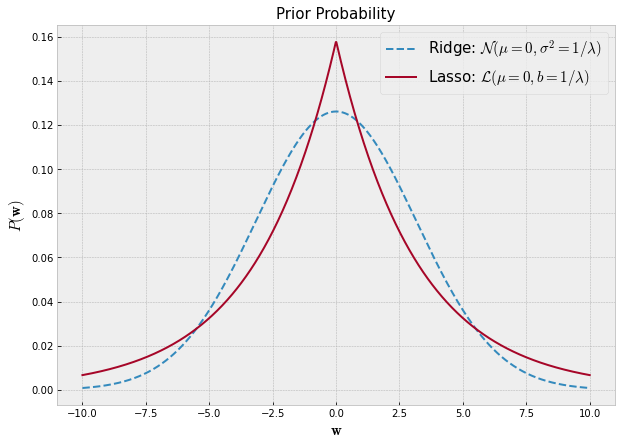

In [24]:
import scipy.stats as stats

x = np.linspace(-10,10,1000)

lam = 0.1

G = stats.norm(0, np.sqrt(1/lam))
L = stats.laplace(0, np.sqrt(1/lam))

plt.figure(figsize=(10,7))
plt.plot(x, G.pdf(x), '--', label='Ridge: $\mathcal{N}(\mu=0,\sigma^2=1/\lambda)$')
plt.plot(x, L.pdf(x), label='Lasso: $\mathcal{L}(\mu=0,b=1/\lambda)$')
plt.legend(loc='best', fontsize=15); plt.xlabel('$\mathbf{w}$', size=15)
plt.ylabel('$P(\mathbf{w})$', size=15); plt.title('Prior Probability',size=15);

___

# Maximum Likelihood Estimation (MLE) & Maximum A Posteriori (MAP)

<h2 align="center"><span style="color:blue">Maximum Likelihood Estimation (MLE)</span></h2>
<center>(Frequentist approach)</center>

In **Maximum Likelihood Estimation** (also referred to as **MLE**) we want to *find the set of parameters* that **maximize** the data likelihood $P(\mathbf{t}|\mathbf{y}(\mathbf{x};\mathbf{w}))$. We want to find the *optimal* set of parameters under some assumed distribution such that the data is most likely.

<h2 align="center"><span style="color:orange">Maximum A Posteriori (MAP)</span></h2>
<center>(Bayesian approach)</center>

In **Maximum A Posteriori** (also referred as **MAP**) we want to *find the set of parameters* that **maximize** the posterior probability $P(\mathbf{w}|\mathbf{t})$. We want to find the *optimal* set of parameters under some assumed distribution such that the parameters are most likely to have been drawn off of given some prior beliefs.

## Illustration Example

**Suppose you flip a coin 3 times. Let $H_i$ be the event that we observe Heads on flip $i$. Consider the event $E=H_1\cap H_2\cap H_3$, i.e. all flips were Heads. What is the probability that the next flip is Heads?**

From classical probability (frequentist), we look only at data to compute the probability of flipping Heads:

\begin{align*}
P(H) = \frac{\text{# observed Heads}}{\text{# flips}} = \frac{3}{3} = 1
\end{align*}

From Bayesian statistics, we use Bayesian inferencing: What is the **hidden state** in this problem?

* Hidden state: what type of coin was use in the experiment
* Let's assume that we think only two types of coins could have been used, one fair coin and one 2-headed coin. So, by the **Law of Total Probability**:

\begin{align*}
P(H) = P(H|\text{fair})P(\text{fair}) + P(\overline{H}|\text{2-headed})P(\text{2-headed})
\end{align*}

Furthermore, we can test different hypothesis by checking which hypothesis has the largest posterior probability value, e.g. if $P(\text{fair}|E) > P(\text{2-headed}|E)$, then hypothesis "fair" is more likely and that is what we will use to make predictions.
    
Note that the events $H_i$ are **conditionally independent**, that is: $P(H_1\cap H_2|\text{fair}) = P(H_1|\text{fair})P(H_2|\text{fair})$.

## MLE and MAP Solutions

Let's assign heads to the numerical value 1 and tails to 0. The sample space is $S=\{0,1\}$. Let $X$ be the discrete random variable (R.V.) that describes the outcome of flipping a coin. Furthermore, let the probability of heads ($x=1$) be equal to some *unknown* value $\mu$. The probability mass function (pmf) of this R.V. is defined as:

\begin{align*}
p(x|\mu) = \begin{cases} \mu & \text{if } x=1 \\ 1-\mu & \text{if }x=0\\ 0 & \text{otherwise}  \end{cases}
\end{align*}

* This is the **Bernoulli** discrete R.V.. The mean and variance (1st and 2nd moment) of the Bernoulli distribution are: $E[x] = \mu$ and $E[\left(x- E[x]\right)^2] = \mu(1-\mu)$.

* So, for every outcome of the event $E$, we will model it using a Bernoulli distribution, and each outcome is pairwise **conditionally independent**. Therefore, we have the event $E$ contains i.i.d. outcomes.

### Maximum Likelihood (MLE) Estimator

For simplicity of calculation, let $E=x_1\cap x_2\cap \dots\cap x_N$, where $x_i=\{0,1\}$ (0 for Tails and 1 for Heads). Then, for an experiment with $N$ samples, we can write the **data likelihood** as:

\begin{align*}
P(\mathbf{x}|\mu) &= P(x_1\cap x_2\cap \dots\cap x_N|\mu) \\
&= P(x_1|\mu)P(x_2|\mu)\dots P(x_N|\mu) \\
&= \prod_{n=1}^N p(x_n|\mu) \\
&= \prod_{n=1}^N \mu^{x_n} (1-\mu)^{1-x_n}
\end{align*}

Now, we are interested in finding the value of $\mu$ given a set of samples $\mathbf{x}=\{x_i\}_{i=1}^N$. 

To optimize the data likelihood, we can apply the natural logarithm function to simplify:

\begin{align*}
arg_\mathbf{\mu} \max P(\mathbf{x}|\mu) &= \arg_\mathbf{\mu} \max \ln \left( P(\mathbf{x}|\mu) \right)
\end{align*}

where

\begin{align*}
\mathcal{L} &= \ln \left( P(\mathbf{x}|\mu) \right) = \sum_{n=1}^N \left(x_n \ln(\mu) + (1-x_n)\ln(1-\mu)\right)
\end{align*}

So now we can take the derivative of this function with respect to (w.r.t.) $\mu$ and equal it to zero:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \mu} &= 0\\
(1-\mu)\sum_{n=1}^N x_n - \mu \left(N - \sum_{n=1}^N x_n\right) &= 0 \\
\sum_{n=1}^N x_n - \mu\sum_{n=1}^N x_n - \mu N + \mu\sum_{n=1}^N x_n &= 0 \\
\sum_{n=1}^N x_n - \mu N &= 0 \\
\mu_{\text{MLE}} &= \frac{1}{N} \sum_{n=1}^N x_n
\end{align*}

As expected, the MLE estimation for the probability of seeing heads in the next coin flip is equal to the **relative frequency** of the outcome heads.

* Suppose you flipped the coin only once, and saw Tails. The probability of flipping Heads according to MLE would be 0.

* MLE is **purely data driven**! This is sufficient *when* we have lots and lots of data.

### Maximum A Posteriori (MAP) Estimator

In the MAP estimation of $\mu$, we are instead optimizing the posterior probability:

\begin{align*}
&\arg_{\mu} \max P(\mu|\mathbf{x}) \\
=& \arg_{\mu} \max \frac{P(\mathbf{x}|\mu) P(\mu)}{P(\mathbf{x})} \\
\propto & \text{  } \arg_{\mu} \max P(\mathbf{x}|\mu) P(\mu), P(\mathbf{x})\text{ is some constant value} 
\end{align*}

We have defined the data likelihood $P(\mathbf{x}|\mu)$, we now need to choose a **prior distribution** $P(\mu)$.

* This prior distribution will *encode* any prior knowledge we have about the hidden sate of the problem, in this case, the type of coin that was used.

Let's say our **prior distribution** is the Beta Distribution. The Beta Distribution takes the form:

\begin{align*}
\text{Beta}(x|\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}
\end{align*}

where $\Gamma(x) = (x-1)!$ and $\alpha,\beta>0$.

The mean and variance of the Beta distribution are: $E[x] = \frac{\alpha}{\alpha+\beta}$ and $E[(x-E[x])^2] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$.

* Let's see what that looks like:

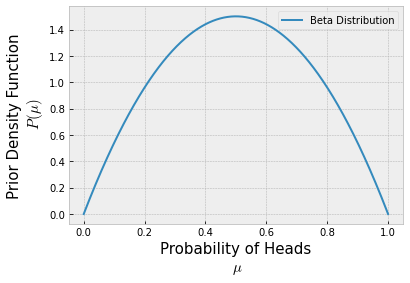

In [13]:
a = 2
b = 2
Beta = stats.beta(a,b)
x = np.linspace(0,1,1000)

plt.plot(x, Beta.pdf(x), label='Beta Distribution')
plt.legend(loc='best')
plt.xlabel('Probability of Heads\n $\mu$',fontsize=15)
plt.ylabel('Prior Density Function\n $P(\mu)$',fontsize=15);

Using the Beta Distribution as out prior, we have:

\begin{align*}
P(\mu|\alpha,\beta) &= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
&\propto \mu^{\alpha-1} (1-\mu)^{\beta-1}
\end{align*}

Let:
* $m$ the number of heads
* $l$ the number of tails
* $N=m+l$ the total number of coin flips 

We can write our **posterior probability** as:

\begin{align*}
P(\mu|\mathbf{x}) &= \frac{P(\mathbf{x}|\mu)P(\mu)}{P(\mathbf{x})}\\
&\propto P(\mathbf{x}|\mu)P(\mu)\\
&= \left(\prod_{n=1}^N \mu^{x_n} (1-\mu)^{1-x_n}\right) \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
&= \mu^m (1-\mu)^l \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
&= \mu^{m+\alpha-1} (1-\mu)^{l+\beta-1}
\end{align*}

The posterior probability has the same shape as the data likelihood. 

This is a special case called **Conjugate Prior Relationship**, which happens when the posterior has the same form as the prior.

We can now optimize our posterior probability, and we will apply the same trick:

\begin{align*}
\mathcal{L} &= \ln P(\mu|\mathbf{x}) = (m+\alpha-1)\ln(\mu) + (l+\beta-1)\ln(1-\mu)
\end{align*}

We can now *optimize* our posterior probability:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \mu} = 0 \iff & \frac{m+\alpha-1}{\mu} + \frac{l+\beta-1}{1-\mu} = 0\\
\mu_{\text{MAP}} &= \frac{m+\alpha-1}{m + l + \alpha + \beta -2}
\end{align*}

This is our estimation of the probability of heads using MAP!

* Our estimation for the probability of heads, $\mu$, is going to depend on $\alpha$ and $\beta$ introduced by the prior distribution. We saw that they control the level of certainty as well as the center value.

* With only a few samples, the prior will play a bigger role in the decision, but eventually the data takes over the prior.

---

## Example

Let's illustrate this example with code:

We saw the example where our input dataset $\{x_i\}_{i=1}^N$ is binary, where $x_i=\{0,1\}, \forall i$. 

For each data sample $x_i$, we modeled its data likelihood as the Bernoulli distribution with parameter $\mu$, i.e.

\begin{align*}
x_i \sim \text{Bernoulli}(\mu)
\end{align*}

Furthermore, we assume that each sample is independent of each other. Hence our dataset is a collection of i.i.d. samples.

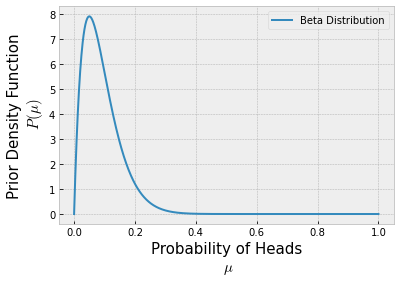

In [16]:
a = 2
b = 20
Beta = stats.beta(a,b)
x = np.linspace(0,1,1000)

plt.plot(x, Beta.pdf(x), label='Beta Distribution')
plt.legend(loc='best')
plt.xlabel('Probability of Heads\n $\mu$',fontsize=15)
plt.ylabel('Prior Density Function\n $P(\mu)$',fontsize=15);

In [17]:
import scipy.stats as stats

trueMU = 0.5 # 0.5 for a fair coin

Nflips = 10

Outcomes = []
for i in range(Nflips):
    Outcomes += [stats.bernoulli(trueMU).rvs(1)[0]]
    print(Outcomes)
    print('MLE (Frequentist, data-driven): Probability of Heads = ', np.sum(Outcomes)/len(Outcomes))
    print('MAP (Bayesian, uses prior): Probability of Heads = ', (np.sum(Outcomes)+a-1)/(len(Outcomes)+a+b-2))
    input('Press enter to flip the coin again...\n')

[1]
MLE (Frequentist, data-driven): Probability of Heads =  1.0
MAP (Bayesian, uses prior): Probability of Heads =  0.09523809523809523
Press enter to flip the coin again...

[1, 0]
MLE (Frequentist, data-driven): Probability of Heads =  0.5
MAP (Bayesian, uses prior): Probability of Heads =  0.09090909090909091
Press enter to flip the coin again...

[1, 0, 1]
MLE (Frequentist, data-driven): Probability of Heads =  0.6666666666666666
MAP (Bayesian, uses prior): Probability of Heads =  0.13043478260869565
Press enter to flip the coin again...

[1, 0, 1, 1]
MLE (Frequentist, data-driven): Probability of Heads =  0.75
MAP (Bayesian, uses prior): Probability of Heads =  0.16666666666666666
Press enter to flip the coin again...

[1, 0, 1, 1, 1]
MLE (Frequentist, data-driven): Probability of Heads =  0.8
MAP (Bayesian, uses prior): Probability of Heads =  0.2
Press enter to flip the coin again...

[1, 0, 1, 1, 1, 1]
MLE (Frequentist, data-driven): Probability of Heads =  0.8333333333333334
M

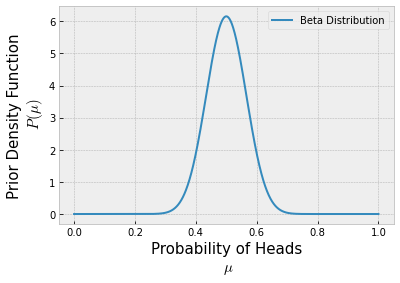

In [19]:
a = 30
b = 30
Beta = stats.beta(a,b)
x = np.linspace(0,1,1000)

plt.plot(x, Beta.pdf(x), label='Beta Distribution')
plt.legend(loc='best')
plt.xlabel('Probability of Heads\n $\mu$',fontsize=15)
plt.ylabel('Prior Density Function\n $P(\mu)$',fontsize=15);

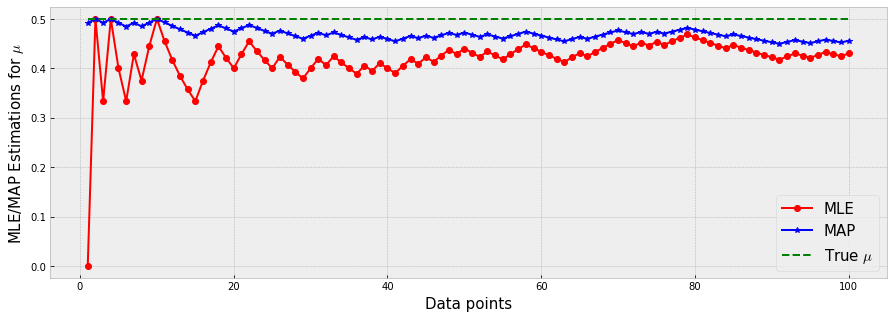

In [21]:
# True value of the unknown parameter
trueMU = 0.5 # 0.5 for a fair coin

# Prior Initial Parameters
a=30 # alpha
b=30 # beta

# Sampling Training Data
Nflips = 100
Outcomes = stats.bernoulli(trueMU).rvs(Nflips)

# Computing MLE and MAP estimates as data is being collected
mu_MLE = []
mu_MAP = []
for i in range(1,Nflips+1):
    mu_MLE += [np.sum(Outcomes[:i])/len(Outcomes[:i])]
    mu_MAP += [(np.sum(Outcomes[:i])+a-1)/(len(Outcomes[:i])+a+b-2)]

# Plotting estimates
plt.figure(figsize=(15,5))
plt.plot(range(1,Nflips+1), mu_MLE, '-or', label='MLE')
plt.plot(range(1,Nflips+1), mu_MAP, '-*b', label='MAP')
plt.plot(range(1,Nflips+1), [trueMU]*Nflips, '--g', label='True $\mu$')
plt.xlabel('Data points',size=15)
plt.ylabel('MLE/MAP Estimations for $\mu$',size=15)
plt.legend(fontsize=15);

___

<h2 align="center"><span style="color:blue">Maximum Likelihood Estimation (MLE)</span></h2>
<center>(Frequentist approach)</center>

$$\arg_{\mathbf{w}} \max P(\mathbf{t}|\mathbf{w})$$

In **Maximum Likelihood Estimation** we *find the set of parameters* that **maximize** the data likelihood $P(\mathbf{t}|\mathbf{w})$. We find the *optimal* set of parameters under some assumed distribution such that the data is most likely.

* MLE focuses on maximizing the data likelihood, which *usually* provides a pretty good estimate

* A common trick to maximize the data likelihood is to maximize the log likelihood

* MLE is purely data driven 

* MLE works best when we have lots and lots of data

* MLE will likely overfit when we have small amounts of data or, at least, becomes unreliable

* It estimates relative frequency for our model parameters. Therefore it needs incredibly large amounts of data (infinite!) to estimate the true likelihood parameters
    * This is a problem when we want to make inferences and/or predictions outside the range of what the training data has learned

<h2 align="center"><span style="color:orange">Maximum A Posteriori (MAP)</span></h2>
<center>(Bayesian approach)</center>

\begin{align}
& \arg_{\mathbf{w}} \max P(\mathbf{t}|\mathbf{w})P(\mathbf{w}) \\ 
& \propto \arg_{\mathbf{w}} \max P(\mathbf{w}|\mathbf{t})
\end{align}

In **Maximum A Posteriori** we *find the set of parameters* that **maximize** the the posterior probability $P(\mathbf{w}|\mathbf{t})$. We find the *optimal* set of parameters under some assumed distribution such that the parameters are most likely to have been drawn off of.

* MAP focuses on maximizing the posterior probability - data  likelihood with a prior

* A common trick to maximize the posterior probability is to maximize the log likelihood

* MAP is data driven 

* MAP is mostly driven by the prior beliefs

* MAP works great with small amounts of data *if* our prior was chosen well

* We need to assume and select a distribution for our prior beliefs
    * A wrong choice of prior distribution can impact negatively our model estimation
    
* When we have lots and lots of data, the data likelihood will take over and the posterior will depend less and less on the prior

___

## Could we update the prior as we receive data?

* What if we could fine-tune the prior probability's parameters ($\alpha$ and $\beta$, in this example) as we see more data?

* Could we use the posterior probability to update the prior probability's parameters? That is, to select new values for $\alpha$ and $\beta$ using a data informative prior?

* What cases would make this possible?

---

### Review Before Next Class

* Bivariate Gaussian PDF
* Covariance matrix
* Contours of a bivariate Gaussian PDF